## Librerias


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import(
    KFold,
    ShuffleSplit,
    cross_val_score,
    learning_curve,
    train_test_split,
)
from sklearn.pipeline import Pipeline

## Carga del dataset (prepocesado)

In [ ]:
df=pd.read_csv('datos_personas_base_model.csv')

In [24]:
df

,edad,dependientes,salario,categoria_nw_cliente,codigo_sucursal,saldo_actual,saldo_final_mes_anterior,saldo_mes_actual,saldo_mes_anterior,objetivo,genero_Mujer,ocupacion_Independiente,ocupacion_Pensionado,ocupacion_Trabajador
0,66,0,187,2,755,1458,1458,1458,1458,0,0,1,0,0
1,31,0,146,2,41,3913,5815,5006,5070,0,0,0,0,1
2,42,2,1494,3,388,927,1401,1157,1677,1,0,1,0,0
3,42,0,1096,2,1666,15202,16059,15719,15349,0,1,1,0,0
4,72,0,1020,1,1,7006,7714,7076,7755,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22318,85,0,1589,2,389,1741,1741,1741,1741,0,0,0,1,0
22319,10,0,1020,2,1207,1076,1076,1076,1076,0,1,0,0,0
22320,47,0,1096,2,588,65511,61017,61078,57564,1,0,0,0,1
22321,50,3,1219,3,274,1625,1625,1625,1625,0,0,1,0,0


In [25]:
features = ['edad', 'dependientes', 'salario','saldo_actual','genero_Mujer','ocupacion_Independiente','ocupacion_Pensionado','ocupacion_Trabajador']

In [26]:
x_features = df[features]

In [27]:
y_target = df['objetivo']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size=0.25, stratify=y_target)

In [29]:
x_train.shape, y_train.shape

((16742, 8), (16742,))

In [30]:
x_test.shape, y_test.shape

((5581, 8), (5581,))

In [31]:
x_train

,edad,dependientes,salario,saldo_actual,genero_Mujer,ocupacion_Independiente,ocupacion_Pensionado,ocupacion_Trabajador
9237,64,0,1308,5308,0,1,0,0
13035,12,0,363,1627,0,0,0,0
7230,32,0,1096,2396,0,0,0,1
8995,56,0,37,7480,1,1,0,0
21097,44,0,221,1429,1,1,0,0
...,...,...,...,...,...,...,...,...
14425,21,0,146,42,0,0,0,0
20464,56,0,1096,4474,0,1,0,0
20697,44,0,1020,19615,0,0,0,1
15232,66,0,1613,2980,1,1,0,0


In [32]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16742 entries, 9237 to 1163
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   edad                     16742 non-null  int64
 1   dependientes             16742 non-null  int64
 2   salario                  16742 non-null  int64
 3   saldo_actual             16742 non-null  int64
 4   genero_Mujer             16742 non-null  int64
 5   ocupacion_Independiente  16742 non-null  int64
 6   ocupacion_Pensionado     16742 non-null  int64
 7   ocupacion_Trabajador     16742 non-null  int64
dtypes: int64(8)
memory usage: 1.1 MB


In [41]:
x_test

,edad,dependientes,salario,saldo_actual,genero_Mujer,ocupacion_Independiente,ocupacion_Pensionado,ocupacion_Trabajador
1353,64,0,1096,1789,1,1,0,0
8563,51,0,506,3531,0,1,0,0
2308,52,3,15,576,0,1,0,0
20137,13,0,409,2866,0,0,0,0
6600,65,0,1020,2065,1,1,0,0
...,...,...,...,...,...,...,...,...
13711,50,0,409,1543,1,1,0,0
22132,57,2,517,6057,0,1,0,0
6290,43,2,15,1435,0,1,0,0
51,68,0,1111,4091,1,1,0,0


In [33]:
y_test

,objetivo
1353,0
8563,0
2308,0
20137,0
6600,0
...,...
13711,0
22132,0
6290,0
51,0


In [34]:
class HeuristicModel(BaseEstimator, ClassifierMixin):
    def __init__(self, saldo_threshold=5000, salario_threshold=1200, dependientes_threshold=10):
        self.saldo_threshold = saldo_threshold
        self.salario_threshold = salario_threshold
        self.dependientes_threshold = dependientes_threshold

    def fit(self, X, y=None):
        if y is not None:
            self.classes_ = np.unique(y)
        return self

    def predict(self, X):
        predictions = []

        for _, row in X.iterrows():
            # Regla 1: muchos dependientes -> más riesgo
            if row['dependientes'] > self.dependientes_threshold:
                predictions.append(1)
            # Regla 2: saldo_actual muy bajo -> más riesgo
            elif row['saldo_actual'] < self.saldo_threshold:
                predictions.append(1)

            # Regla 3: pensionados -> menos riesgo
            elif 'ocupacion_Pensionado' in X.columns and row['ocupacion_Pensionado'] == 1:
                predictions.append(0)

            # Regla 4: salario muy alto -> menos riesgo
            elif row['salario'] > self.salario_threshold:
                predictions.append(0)

            # Caso por defecto
            else:
                predictions.append(0)

        return np.array(predictions)

In [35]:
# Instanciar y evaluar el modelo
modelo = HeuristicModel()
modelo.fit(x_train, y_train)
predicciones = modelo.predict(x_test)

print("Predicciones:", predicciones)

Predicciones: [1 1 1 ... 1 1 0]


De una forma más resumida

In [36]:
model = HeuristicModel()

scoring_metrics = ["accuracy", "f1", "precision", "recall"]

kfold = KFold(n_splits=10)

model_pipe = Pipeline(steps=[("model", model)])

cv_results = {}
train_results = {}

# Ejecutamos validación cruzada
for metric in scoring_metrics:
    cv_results[metric] = cross_val_score(
        model_pipe, x_train, y_train, cv=kfold, scoring=metric
    )
    # Se evalúa sobre el Dataset de pruebas
    model_pipe.fit(x_train, y_train)
    train_results[metric] = model_pipe.score(x_train, y_train)

# Se convierten los resultados en un df
cv_results_df = pd.DataFrame(cv_results)

Variablidad entre las métricas

accuracy - CV mean: 0.44, CV std: 0.01
accuracy - Train score: 0.44
f1 - CV mean: 0.35, CV std: 0.02
f1 - Train score: 0.44
precision - CV mean: 0.22, CV std: 0.01
precision - Train score: 0.44
recall - CV mean: 0.82, CV std: 0.01
recall - Train score: 0.44


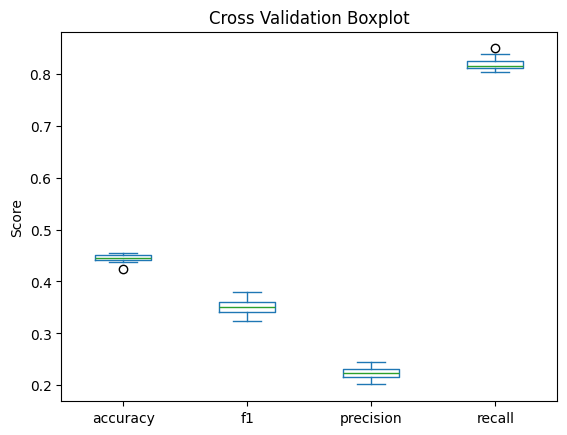

In [37]:
for metric_name in scoring_metrics:
    mean_score = cv_results_df[metric_name].mean()
    std_score = cv_results_df[metric_name].std()
    train_score = train_results[metric_name]

    print(
        f"{metric_name} - CV mean: {mean_score:.2f}, CV std: {std_score:.2f}"
    )
    print(f"{metric_name} - Train score: {train_score:.2f}")

# Create a boxplot for the cross-validation results of each metric
cv_results_df.plot.box(title="Cross Validation Boxplot", ylabel="Score");

Conjunto de entrenamiento vs evaluación

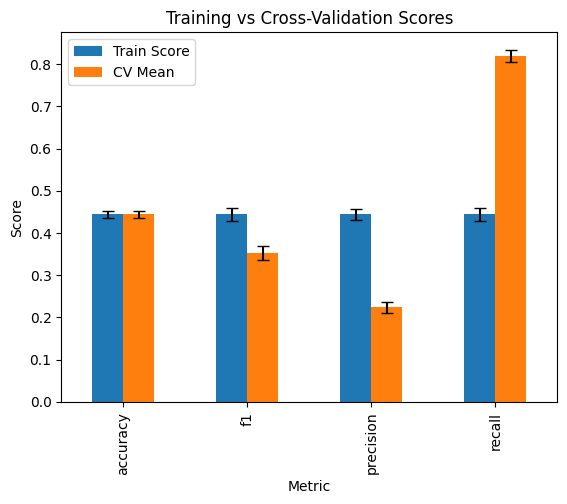

In [38]:
metrics_df = pd.DataFrame(
    {
        "Metric": scoring_metrics,
        "Train Score": [train_results[metric] for metric in scoring_metrics],
        "CV Mean": [cv_results_df[metric].mean() for metric in scoring_metrics],
        "CV Std": [cv_results_df[metric].std() for metric in scoring_metrics],
    }
)

# Create a bar plot for the training and cross-validation metrics
metrics_df.plot(
    kind="bar",
    x="Metric",
    y=["Train Score", "CV Mean"],
    yerr="CV Std",
    title="Training vs Cross-Validation Scores",
    ylabel="Score",
    capsize=4,
);

Matriz de confusión

In [39]:
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    PrecisionRecallDisplay,
    classification_report,
)
y_pred = model_pipe.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.36      0.52      4552
           1       0.22      0.81      0.35      1029

    accuracy                           0.44      5581
   macro avg       0.56      0.59      0.43      5581
weighted avg       0.77      0.44      0.48      5581



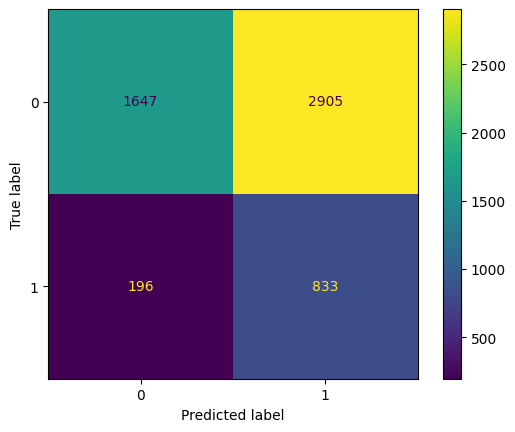

In [40]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

Consistencia del modelo

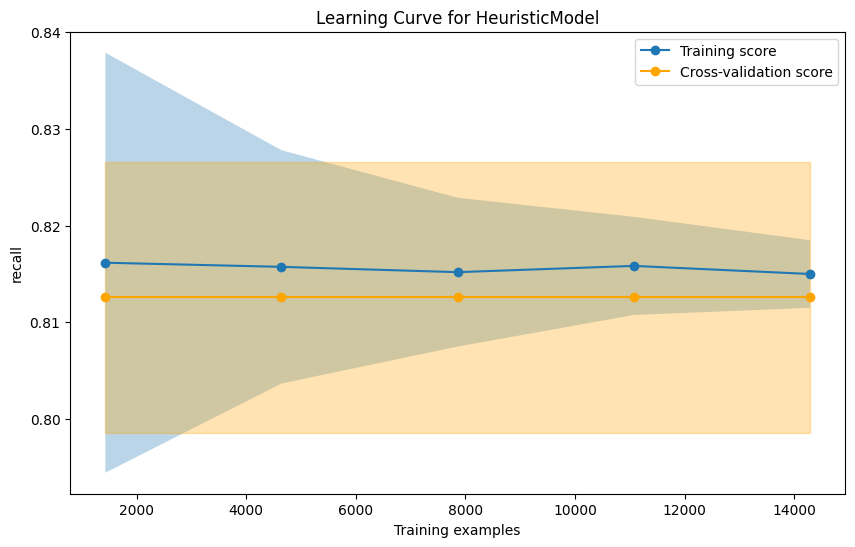

Training Sizes: [ 1428  4642  7857 11071 14286]
Training Scores Mean: [0.81615804 0.81573161 0.81518321 0.81582958 0.81499618]
Training Scores Std: [0.02168902 0.01204659 0.00768122 0.00506984 0.00349227]
Test Scores Mean: [0.81258798 0.81258798 0.81258798 0.81258798 0.81258798]
Test Scores Std: [0.01401642 0.01401642 0.01401642 0.01401642 0.01401642]


In [20]:
common_params = {
    "X": x_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=123),
    "n_jobs": -1,
    "return_times": True,
}

scoring_metric = "recall"

train_sizes, train_scores, test_scores, fit_times, score_times = learning_curve(
    model_pipe, **common_params, scoring=scoring_metric
)

# Calculate the mean and standard deviation of the scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Calculate the mean and standard deviation of the fit and score times
fit_times_mean = np.mean(fit_times, axis=1)
fit_times_std = np.std(fit_times, axis=1)
score_times_mean = np.mean(score_times, axis=1)
score_times_std = np.std(score_times, axis=1)

# Plot the learning curve
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharey=True)
ax.plot(train_sizes, train_mean, "o-", label="Training score")
ax.plot(train_sizes, test_mean, "o-", color="orange", label="Cross-validation score")
ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.3)
ax.fill_between(
    train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.3, color="orange"
)

# Configure the title and labels
ax.set_title(f"Learning Curve for {model.__class__.__name__}")
ax.set_xlabel("Training examples")
ax.set_ylabel(scoring_metric)
ax.legend(loc="best")

# Show the plot
plt.show()

# Print the values for analysis
print("Training Sizes:", train_sizes)
print("Training Scores Mean:", train_mean)
print("Training Scores Std:", train_std)
print("Test Scores Mean:", test_mean)
print("Test Scores Std:", test_std)

Escalabilidad

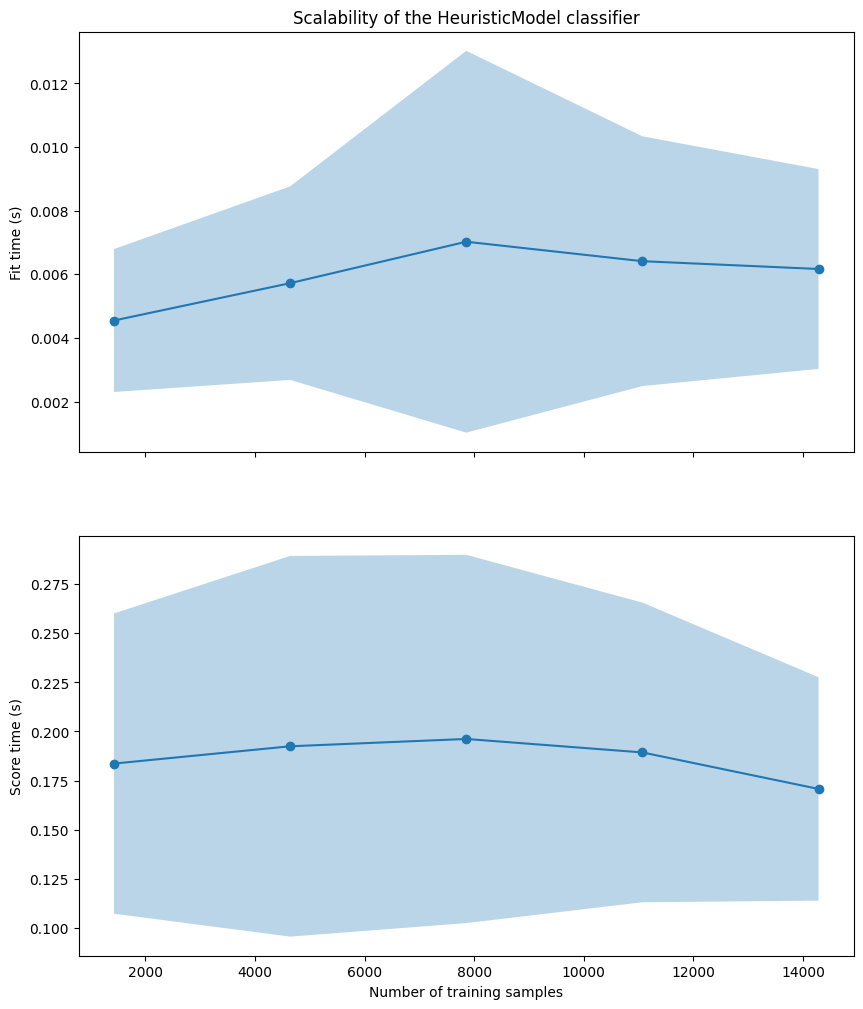

Fit Times Mean: [0.00454947 0.00572334 0.00702572 0.00641405 0.00616894]
Fit Times Std: [0.00224561 0.00304112 0.00599951 0.0039249  0.00314059]
Score Times Mean: [0.18364173 0.19245297 0.19618741 0.18932433 0.17071256]
Score Times Std: [0.07651638 0.09700933 0.0938459  0.07637465 0.05692007]


In [21]:
# Plot the scalability regarding fit time and score time
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 12), sharex=True)

# Scalability regarding the fit time
ax[0].plot(train_sizes, fit_times_mean, "o-")
ax[0].fill_between(
    train_sizes,
    fit_times_mean - fit_times_std,
    fit_times_mean + fit_times_std,
    alpha=0.3,
)
ax[0].set_ylabel("Fit time (s)")
ax[0].set_title(f"Scalability of the {model.__class__.__name__} classifier")

# Scalability regarding the score time
ax[1].plot(train_sizes, score_times_mean, "o-")
ax[1].fill_between(
    train_sizes,
    score_times_mean - score_times_std,
    score_times_mean + score_times_std,
    alpha=0.3,
)
ax[1].set_ylabel("Score time (s)")
ax[1].set_xlabel("Number of training samples")

# Show the plot
plt.show()

# Print the fit and score times for analysis
print("Fit Times Mean:", fit_times_mean)
print("Fit Times Std:", fit_times_std)
print("Score Times Mean:", score_times_mean)
print("Score Times Std:", score_times_std)
